# Bollinger Bands

**Bandas de Bollinger®** identifica os pontos de alta e baixa volatilidade de uma ação. Embora possa ser um verdadeiro desafio prever preços futuros e ciclos de preços, as mudanças e os ciclos de volatilidade são relativamente fáceis de identificar. Isso ocorre porque as ações se alternam entre períodos de oscilação com uma maior ou menor intensidade.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Datasource
ds_yahoo = 'yahoo'

# Período de um ano atrás a partir de hoje
last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

In [3]:
# Recuperando dados da Itaú
vale = web.DataReader('VALE3.SA', ds_yahoo, start, end)

## Calculando a média móvel simples e os devios padrão

In [4]:
# Linha central através da Média Móvel Simples de 20 períodos
vale['20-SMA'] = vale['Adj Close'].rolling(window=20).mean()

# Bandas superior e inferior a partir do desvio padrão de 20 períodos
vale['Upper'] = vale['Adj Close'] + 2 * vale['Adj Close'].rolling(window=20).std()
vale['Lower'] = vale['Adj Close'] - 2 * vale['Adj Close'].rolling(window=20).std()

## Gráfico das Bandas de Bollinger

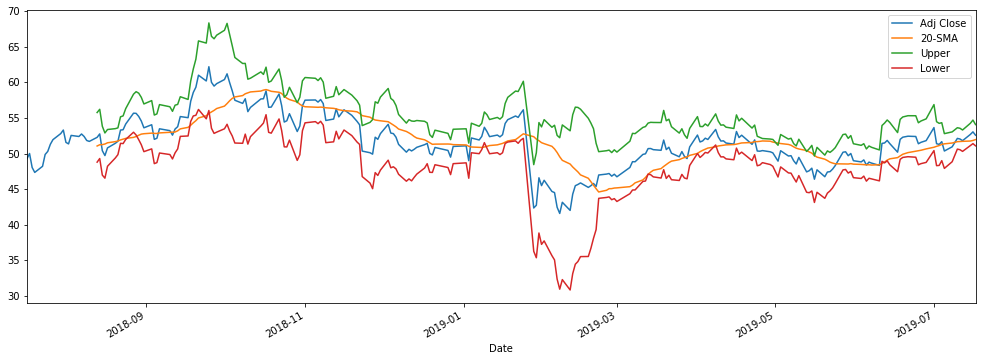

In [6]:
vale[['Adj Close', '20-SMA', 'Upper', 'Lower']].plot(figsize=(17,6));